Mann-Whitney U Statistic: 151372.5
P-value: 1.8005968489930784e-69
Statistically significant difference


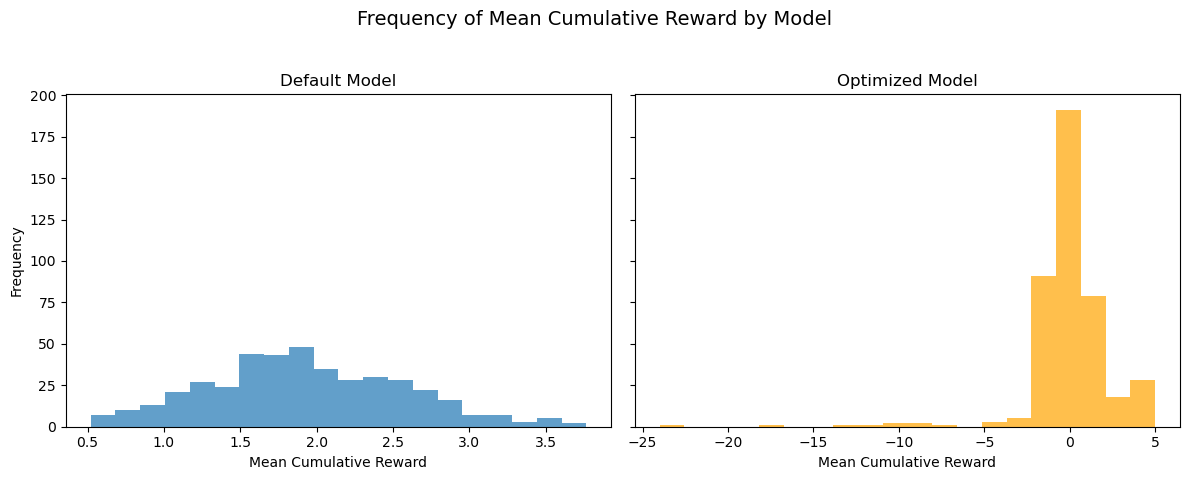

In [3]:
import pandas as pd
import os
import scipy.stats as stats
import matplotlib.pyplot as plt

file1 = r"./Results/testppoDefault_MoveToGoal.csv"
file2 = r"./Results/testppoOpt_MoveToGoal.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

values1 = df1["Value"].dropna()
values2 = df2["Value"].dropna()

u_statistic, p_value = stats.mannwhitneyu(values1, values2, alternative="two-sided")

alpha = 0.05

print(f"Mann-Whitney U Statistic: {u_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Statistically significant difference")
else:
    print("No significant difference")

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axs[0].hist(values1, bins=20, alpha=0.7)
axs[0].set_title("Default Model")
axs[0].set_xlabel("Mean Cumulative Reward")
axs[0].set_ylabel("Frequency")

axs[1].hist(values2, bins=20, alpha=0.7, color="orange")
axs[1].set_title("Optimized Model")
axs[1].set_xlabel("Mean Cumulative Reward")

plt.suptitle("Frequency of Mean Cumulative Reward by Model", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

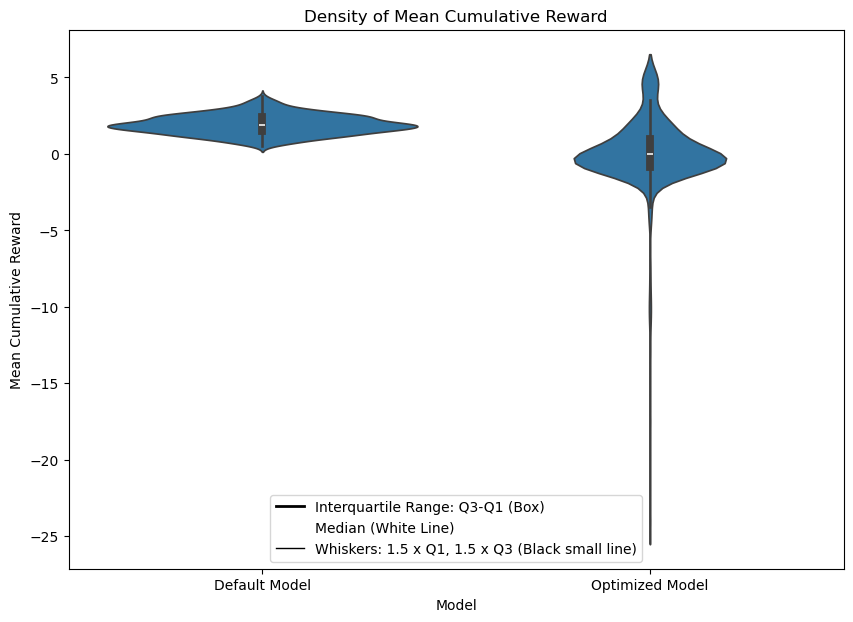

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df_violin = pd.DataFrame({
    "Mean Cumulative Reward": list(values1) + list(values2),
    "Model": ["Default Model"] * len(values1) + ["Optimized Model"] * len(values2)
})

plt.figure(figsize=(10, 7))
sns.violinplot(x="Model", y="Mean Cumulative Reward", data=df_violin)

plt.title("Density of Mean Cumulative Reward")

handles = [
    plt.Line2D([0], [0], color='black', lw=2),
    plt.Line2D([0], [0], color='white', lw=2),
    plt.Line2D([0], [0], color='black', lw=1)
]

labels = [
    'Interquartile Range: Q3-Q1 (Box)',
    'Median (White Line)',
    'Whiskers: 1.5 x Q1, 1.5 x Q3 (Black small line)'
]

plt.legend(handles=handles, labels=labels,loc='lower center')
plt.show()

In [5]:
print(f"Mean Default Model: {values1.mean()}")
print(f"Mean Optimized Model: {values2.mean()}")

Mean Default Model: 1.932439667270297
Mean Optimized Model: 0.044856244171003125
